<a href="https://colab.research.google.com/github/Zied-BenBahri/deep-learning/blob/main/TP1_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DEEP LEARNING PERCEPTRON**

## **Functions :**

*Implémentation du Perceptron*

In [58]:
import numpy as np

def heaviside(z):
    return np.where(z > 0, 1, 0)

def perceptron(X, y, lr, epochs, initialization='zeros'):
    """
    Algorithme du perceptron avec choix d'initialisation des poids.

    Paramètres :
    - X : les features (shape: (n_samples, n_features)).
    - y : les labels (shape: (n_samples,)).
    - lr : taux d'apprentissage (learning rate).
    - epochs : nombre d'itérations.
    - initialization : méthode d'initialisation des poids ('zeros' ou 'random').

    Retourne :
    - w : les poids appris (shape: (n_features + 1, 1)).
    - n_miss_list : liste du nombre de points mal classés à chaque époque.
    """
    m, n = X.shape

    # Initialisation des poids
    if initialization == 'zeros':
        w = np.zeros((n + 1, 1))  # Initialisation à zéro
    elif initialization == 'random':
        w = np.random.rand(n + 1, 1)  # Initialisation aléatoire
    else:
        raise ValueError("Initialization must be 'zeros' or 'random'")

    n_miss_list = []

    # Entraînement
    for epoch in range(epochs):
        n_miss = 0
        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)  # Ajout du biais (x0 = 1)
            y_hat = heaviside(np.dot(x_i.T, w))  # Prédiction
            if (np.squeeze(y_hat) - y[idx]) != 0:  # Si mal classé
                w += lr * (y[idx] - y_hat) * x_i  # Mise à jour des poids
                n_miss += 1
        n_miss_list.append(n_miss)

    return w, n_miss_list

*Génération du Dataset*

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split

def generate_dataset(sigma1, sigma2, n_samples=250, random_state=42):
    """
    Génère un dataset avec deux classes suivant des distributions gaussiennes.

    Paramètres :
    - sigma1 : écart-type pour la première classe.
    - sigma2 : écart-type pour la deuxième classe.
    - n_samples : nombre total de points (par défaut 250).
    - random_state : seed pour la reproductibilité.

    Retourne :
    - X : les features (shape: (n_samples, 2)).
    - y : les labels (shape: (n_samples,)).
    """
    np.random.seed(random_state)

    # Moyennes des deux classes
    mu1 = np.array([-1, 0])
    mu2 = np.array([1, 0])

    # Génération des points pour les deux classes
    class1 = np.random.normal(mu1, sigma1, (n_samples // 2, 2))
    class2 = np.random.normal(mu2, sigma2, (n_samples // 2, 2))

    # Étiquettes
    labels1 = np.zeros(n_samples // 2)  # Classe 1 : y = 0
    labels2 = np.ones(n_samples // 2)   # Classe 2 : y = 1

    # Concaténation des données et des étiquettes
    X = np.vstack((class1, class2))
    y = np.hstack((labels1, labels2))

    # Mélange et division en train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    return X_train, X_test, y_train, y_test

*Tracage de la Frontière de Décision :*

In [28]:
import matplotlib.pyplot as plt

def plot_data_and_boundary(X, y, w, title="Decision Boundary"):
    """
    Trace les points de données et la frontière de décision.

    Paramètres :
    - X : les features (shape: (n_samples, 2)).
    - y : les labels (shape: (n_samples,)).
    - w : les poids du perceptron (shape: (3, 1)).
    - title : titre du graphique (optionnel).
    """
    # Tracé des points de données
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, label='Train Data')

    # Tracé de la frontière de décision
    x1 = [min(X[:, 0]), max(X[:, 0])]
    m = -w[1] / w[2]
    c = -w[0] / w[2]
    x2 = m * np.array(x1) + c
    plt.plot(x1, x2, 'k-', label='Decision Boundary')

    # Ajout des labels et du titre
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

*Calcul de l'Accuracy :*

In [21]:
def accuracy(X, y, w):
    correct = 0
    for idx, x_i in enumerate(X):
        x_i = np.insert(x_i, 0, 1).reshape(-1, 1)
        y_hat = heaviside(np.dot(x_i.T, w))
        if np.squeeze(y_hat) == y[idx]:
            correct += 1
    return correct / len(y)

## **Expérience 1 : σ1 = σ2 = 0.25**

In [50]:
# Expérience 1 : σ1 = σ2 = 0.25
# initialization='zeros', les poids sont initialisés à zéro avec np.zeros.
X_train, X_test, y_train, y_test = generate_dataset(sigma1=0.25, sigma2=0.25)
w, n_miss_list = perceptron(X_train, y_train, lr=0.1, epochs=100)
print(w,n_miss_list)

[[ 0.        ]
 [ 0.14008719]
 [-0.04704256]] [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Si les données sont linéairement séparables alors l'algorithme du perceptron converge toujours, car il trouvera une frontière de décision qui sépare parfaitement les deux classes.

Si **n_miss_list** atteint 0 à un moment donné, cela signifie que l'algorithme a convergé.

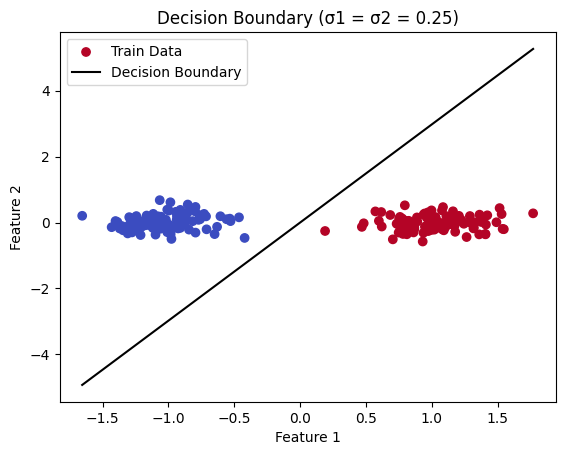

In [46]:
# Tracé des points et de la frontière de décision
plot_data_and_boundary(X_train, y_train, w, title="Decision Boundary (σ1 = σ2 = 0.25)")

Accuracy on test set: 1.00


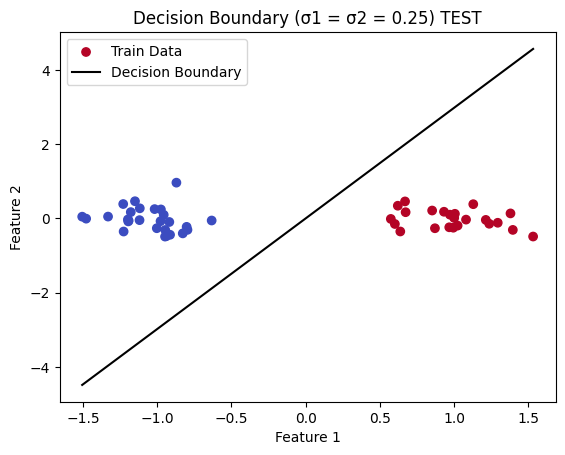

In [47]:
# Accuracy
acc = accuracy(X_test, y_test, w)
print(f"Accuracy on test set: {acc:.2f}")
# Tracage des points et de la frontière de décision pour le test
plot_data_and_boundary(X_test, y_test, w, title="Decision Boundary (σ1 = σ2 = 0.25) TEST")

**Modification de l'initialisation**



In [54]:
# Expérience 1 : σ1 = σ2 = 0.25
# initialization='random', les poids sont initialisés avec des valeurs aléatoires entre 0 et 1 avec np.random.rand
X_train, X_test, y_train, y_test = generate_dataset(sigma1=0.25, sigma2=0.25)
w, n_miss_list = perceptron(X_train, y_train, lr=0.1, epochs=100, initialization='random')
print(w,n_miss_list)

[[0.24591724]
 [0.83598941]
 [0.2929654 ]] [3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


**n_miss_list** atteint 0 à un moment donné, cela signifie que **l'algorithme a convergé**.

On peut donc conclure que la modification de l'initalisation n'affecte pas le résultat de l'algorithme.

## **Expérience 2 : σ1 = σ2 = 0.75**

[[ 0.        ]
 [ 0.15837106]
 [-0.09830813]] [26, 25, 25, 25, 25, 22, 24, 26, 20, 27, 23, 24, 25, 25, 24, 22, 25, 21, 26, 26, 24, 20, 20, 26, 24, 24, 22, 24, 24, 22, 24, 26, 20, 27, 23, 24, 25, 25, 24, 22, 25, 21, 26, 26, 20, 28, 24, 22, 22, 24, 22, 25, 21, 26, 26, 20, 28, 24, 22, 22, 24, 22, 25, 21, 26, 26, 20, 28, 24, 22, 22, 24, 22, 25, 23, 22, 25, 25, 25, 25, 22, 22, 26, 26, 25, 25, 22, 26, 25, 25, 25, 22, 25, 27, 25, 25, 25, 20, 26, 24] 



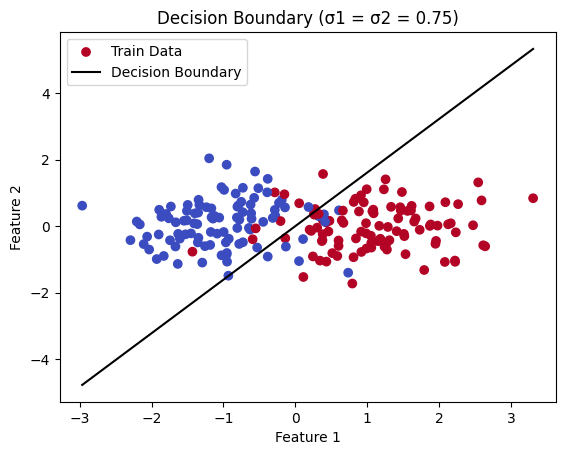


 Accuracy on test set (σ1 = σ2 = 0.75): 0.78 



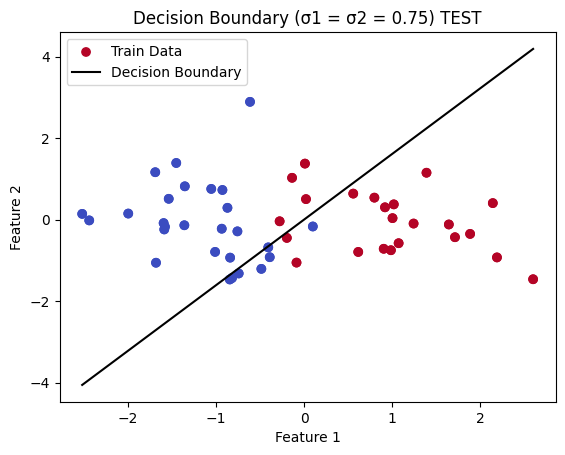

In [59]:
# Expérience 2 : σ1 = σ2 = 0.75
X_train, X_test, y_train, y_test = generate_dataset(sigma1=0.75, sigma2=0.75)
w, n_miss_list = perceptron(X_train, y_train, lr=0.1, epochs=100)
print(w,n_miss_list,"\n")

# Tracé des points et de la frontière de décision
plot_data_and_boundary(X_train, y_train, w, title="Decision Boundary (σ1 = σ2 = 0.75)")

# Calcul de l'accuracy
acc = accuracy(X_test, y_test, w)
print(f"\n Accuracy on test set (σ1 = σ2 = 0.75): {acc:.2f} \n")
# Tracage des points et de la frontière de décision pour le test
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plot_data_and_boundary(X_test, y_test, w, title="Decision Boundary (σ1 = σ2 = 0.75) TEST")

Pour (σ1 = σ2 = 0.75), on a pas de convergence

**Modification de l'initialisation :**

In [60]:
# Expérience 1 : σ1 = σ2 = 0.75
# initialization='random', les poids sont initialisés avec des valeurs aléatoires entre 0 et 1 avec np.random.rand
X_train, X_test, y_train, y_test = generate_dataset(sigma1=0.75, sigma2=0.75)
w, n_miss_list = perceptron(X_train, y_train, lr=0.1, epochs=100, initialization='random')
print(w,n_miss_list)

[[ 0.04591724]
 [ 0.22377305]
 [-0.12513739]] [21, 27, 23, 30, 23, 21, 29, 23, 29, 24, 24, 26, 27, 25, 26, 27, 23, 21, 29, 23, 27, 27, 27, 27, 23, 21, 29, 28, 27, 28, 25, 24, 27, 23, 21, 29, 23, 30, 23, 21, 27, 24, 27, 23, 21, 29, 28, 27, 28, 25, 26, 25, 25, 25, 27, 26, 24, 26, 26, 21, 29, 28, 21, 29, 23, 30, 23, 27, 23, 21, 30, 23, 21, 29, 28, 21, 25, 28, 24, 25, 27, 21, 29, 24, 26, 26, 24, 28, 27, 27, 28, 21, 29, 23, 30, 27, 25, 30, 28, 25]


Pas de convergence si on modifie l'initialisation.

## **Expérience 3 :**

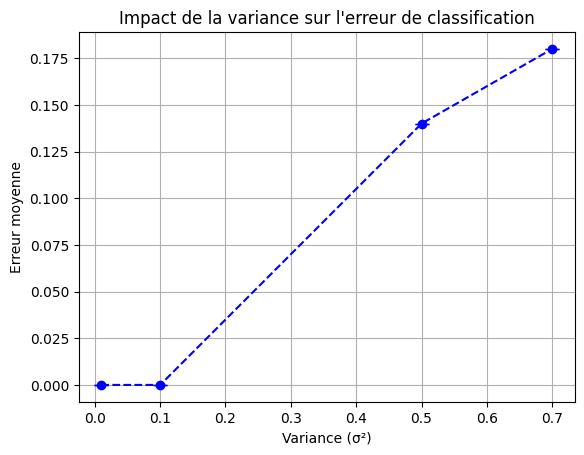

In [65]:
# Expérience 3 : Impact de σ₁² et σ₂²
sigmas_squared = [0.01, 0.1, 0.5, 0.7]
nb_experiments = 30

mean_errors = []
std_errors = []

for sigma_sq in sigmas_squared:
    sigma = np.sqrt(sigma_sq)
    errors = []
    for _ in range(nb_experiments):
        X_train, X_test, y_train, y_test = generate_dataset(sigma, sigma)
        w, _ = perceptron(X_train, y_train,0.1,100,initialization='random')
        acc = accuracy(X_test, y_test, w)
        errors.append(1 - acc)
    mean_errors.append(np.mean(errors))
    std_errors.append(np.std(errors))  # Écart-type

# Tracé des résultats
plt.errorbar(sigmas_squared, mean_errors, yerr=std_errors, fmt='o', capsize=5, color='blue')
plt.plot(sigmas_squared, mean_errors,
         color='blue',
         linestyle='--',
         linewidth=1.5,
         label='Tendance')
plt.xlabel("Variance (σ²)")
plt.ylabel("Erreur moyenne")
plt.title("Impact de la variance sur l'erreur de classification")
plt.grid(True)
plt.show()

**Interprétation des Résultats :**

*Faible variance (σ² = 0.01) :* Les données sont
linéairement séparables → erreur faible et stable.

*Variance élevée (σ² = 0.7) :* Les classes se chevauchent → erreur élevée et variance importante.

*Courbe croissante :* L'erreur augmente avec la variance, car la séparabilité linéaire diminue.